<a href="https://colab.research.google.com/github/sayuri-pudding/HON_JIKKEN/blob/main/HON_JIKKEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#日本語をグラフに書くためのおまじない　1/2
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 4.5 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=3e19aab33e96a298b8cd33dd34716b464eba5e7ab2496818779f3774c30c87b7
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [ ]:
#日本語をグラフに書くためのおまじない2/2
import matplotlib.pyplot as plt
import japanize_matplotlib 

In [ ]:
#便利グッズ
#プロット、ラベルの提示場所指定
import matplotlib.pyplot as plt
import os
dirname="/Users/matsudasayuri/Desktop/file/"
os.makedirs(dirname, exist_ok=True)
def plot(array1,array2,xlabel,ylabel,title,tatehaba):
  plt.rcParams["figure.figsize"] = (5,3)
  plt.plot(range(len(array1)),array1,label="ドレミハンドル")
  plt.plot(range(len(array2)),array2,label="通常ハンドル")
  plt.xticks([0,1,2,3,4],["1-4","5-8","9-12","13-16","17-20"])
  plt.yticks([x for x in range(0,tatehaba,2)],[x for x in range(0,tatehaba,2)])
  plt.legend()
  # plt.legend(prop={"size":15},bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)

#エラー除去
def path_data(path):
  p=0
  # print(path +'*.csv')
  da = glob.glob(path +'*.csv')
  data=sorted(da, key=lambda s: int(re.findall(r'\d+', s)[-1]))
  k=[i for i ,x in enumerate(data) if "error" in x ]
  for i in k:
    # print(k)
    del data[i-p]
    p=p+1
  return data
  
#初心者idだったらtrue  
def is_beginner(id):
  #if id==1 or id==2 or id==4 or id==5 or id==6 or id==7 or id==8 or id==13 or id==14 or id==16 or id==19 or id==20 or id==22:
  if id in [1,2,4,5,6,7,8,13,14,16,17,19,20,21,23]:
    return True
  return False

#ドレミ先軍だったらtrue
def is_doremi_first(group):
  if group=="a" or group=="c":
    return True
  return False

#これは引数が2つの4試行ごとに分けてくれる素敵な関数
def times4(on,off):
  on4.clear()
  off4.clear()
  span=4
  for s in range(1,6):
    count_on=0
    count_off=0
    for i in range((s-1)*span,s*span):
      count_on +=on[i]
    on4.append(count_on/span)
    for i in range((s-1)*span,s*span):
      count_off +=off[i]
    off4.append(count_off/span)
    
#これは全部540で割ってくれる素敵な関数
def change540(on,off):
  handon.clear()
  handoff.clear()
  for i in range(len(on)):
    handon.append(on[i]/540)
    handoff.append(off[i]/540)

In [ ]:
#配列定義
member = [[[]for j in range(20)] for j in range(26)]
for i in range(26):
  member[i][0]=i
print(member)

member_speed=[[[]for j in range(40)] for j in range(26)]
member_time=[[[]for j in range(40)] for j in range(26)]
member_handle=[[[]for j in range(40)] for j in range(26)]
member_handle540=[[[]for j in range(120)] for j in range(26)]
member_handle_sec=[[[]for j in range(40)] for j in range(26)]

a_list=list(range(6))
b_list=list(range(6,12))
c_list=list(range(12,18))
  d_list=list(range(18,24))

print(a_list)
print(b_list)
print(c_list)
print(d_list)

[[0, [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [1, [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [2, [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [3, [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [4, [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [5, [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [6, [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [7, [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [8, [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [9, [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [10, [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [11, [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []], [12, [], [], [], [], [], 

In [ ]:
#修正舵回数
#option all(全長),carve(カーブ中),after(カーブ後) 
#scale tilt(傾き変化でカウント) doremi(音階変化でカウント)
import csv
import numpy as np
def change_num(file,option,scale,groupid,id):
  #ファイルを開く
  csv_file=open(file,encoding = "ISO-8859-1")
  #取り出す
  f=csv.reader(csv_file)
  a=file.split('/')[5]
  member[id][1]=groupid
  member[id][2]=a
  # 配列入れまくり
  next(f)
  speed.clear()
  time.clear()
  handle.clear()
  abshandle.clear()
  abshandle_carve.clear()
  abshandle_after.clear()
  angular_velocity.clear()

  for row in f:
    if row and len(row)>11:
      speed.append(float(row[4]))
      disx.append(float(row[5]))
      disz.append(float(row[7]))
      time.append(float(row[0]))
      h=0
      h=float(row[11])
      #ｈandle=ハンドルの値（小数）
      handle.append(h)
      h=abs(h)*540
      #abshandle=ハンドルの値abs表示
      abshandle.append(h)
      #ドレミ値（90°を７で割った数）
      doremi.append(int(h/(90/7)))

  #maxmin=最大限回している時のインデックス
  maxmin=abshandle.index(max(abshandle))
  #カーブ中のインデックス、カーブ後のインデックスを定義-------------------------
  a=0
  for i in range(len(disx)):
    a=a+1
    if abs(disx[i])<=64 and abs(disz[i])>=60 and abs(disz[i])<=124:
      carve_index.append(a)
    if abs(disx[i])>64:
      after_index.append(a)
  #カーブ中のインデックス、カーブ後のabshandle-------------------------
  #abshandle_carveはカーブ中のabs表示されたハンドル値
  #abshandle_afterはカーブ後のabs表示されたハンドル値
  for s in range(len(disx)):
    if s in carve_index:
      abshandle_carve.append(abshandle[s])
    if s in after_index:
      abshandle_after.append(abshandle[s])

  #scaleがtiltだったら------------------------------
  if scale=='tilt':
    if option=='all':
      for i in range(len(time)-1):
        angular_velocity.append(float(handle[i+1]-handle[i])/(time[i+1]-time[i]))
    if option=='carve':
      for i in range(carve_index[0]-1,carve_index[-1]-1):
        angular_velocity.append(float(handle[i+1]-handle[i])/(time[i+1]-time[i]))
    if option=='after':
      for i in range(after_index[0]-1,after_index[-1]-1):
        angular_velocity.append(float(handle[i+1]-handle[i])/(time[i+1]-time[i]))  

  #修正舵回数
  #傾きから0とる
    only=[]
    only=([i for i in angular_velocity if i != 0])
  #カウントする
    count=0
    for i in range(len(only)-1):
      #もしマイナスの次、プラスになったら、カウント
      if only[i]<0:
        if only[i+1]>0:
          count=count+1
      #もしプラスの次、マイナスになったら、カウント
      if only[i]>0:
        if only[i+1]<0:
          count=count+1
  #配列に入れる
    a=file.split('/')[6]
    #1回目がby_tilt1
    if a=="1":
      by_tilt1.append(count)
    #2回目がby_tilt2
    else:
      by_tilt2.append(count)

  #scaleがdoremiだったら------------------------------
  if scale=='doremi':
    correction_num=0
    #前半
    for i in range(0, maxmin-1):
      if doremi[i]-doremi[i+1]>0:
        if option=='all':
          correction_num=correction_num+1
        if option=='carve':
          if carve_index[0]-1<=i and i<=carve_index[-1]:
            correction_num=correction_num+1
        if option=='after':
          if after_index[0]-1<=i and i<=after_index[-1]:
            correction_num=correction_num+1
    #ターニングポイント
    #後半
    for i in range(maxmin+1,len(abshandle)-1):
      if doremi[i]-doremi[i+1]<0:
        if option=='all':
          correction_num=correction_num+1
        if option=='carve':
          if carve_index[0]-1<=i and i<=carve_index[-1]:
            correction_num=correction_num+1
        if option=='after':
          if after_index[0]-1<=i and i<=after_index[-1]:
            correction_num=correction_num+1
    #配列に入れる
    a=file.split('/')[6]
    #1回目がby_tilt1
    if a=="1":
      by_doremi1.append(correction_num)
    else:
      by_doremi2.append(correction_num)
  

  disx.clear()
  disz.clear()
  dist.clear()
  carve_index.clear()
  after_index.clear()
  doremi.clear()

In [ ]:
import glob
import csv
import re
import matplotlib.pyplot as plt
import copy

#初期化
handle=[]
time=[]
speed=[]
angular_velocity=[]
counter=[]
maxmin=0
abshandle=[]
abshandle_carve=[]
abshandle_after=[]
doremi=[]
  
disx=[]
disz=[]
dist=[]
carve_index=[]
after_index=[]
member_path=[]

#　1セット目　file_path1　2セット目　file_path2
group="a"
#岸！！！！！！！！！！
file_path1 = '/content/drive/MyDrive/Colab Notebooks/KISHI/1/DriverRecording_KISHI_1-d1cea142-acd8-4f7a-88ba-44371bbf87eb_-90'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/KISHI/2/DriverRecording_KISHI_2-6e261da4-dadb-4ccc-898d-2b8b5f92a9d6_90'
member_path.append([file_path1,file_path2,group])

#浅川！！！！！！！！！！
file_path1 = '/content/drive/MyDrive/Colab Notebooks/ASAKAWA/1/DriverRecording_ASAKAWA_1-f6acac99-d86b-4a1c-8263-f7265489c248_-90'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/ASAKAWA/2/DriverRecording_ASAKAWA_2-88b23ce5-af8e-4f42-a8c4-5dea24fac3fd_90'
member_path.append([file_path1,file_path2,group])

#藤村！！！！！！！！！！
file_path1 = '/content/drive/MyDrive/Colab Notebooks/FUJIMURA/1/DriverRecording_FUJIMURA_1-f288aa03-0031-4158-a6ac-c22ec3c991ea_-90'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/FUJIMURA/2/DriverRecording_FUJIMURA_2-1e08ef24-cace-4fca-aab7-cc192876c5e4_90'
member_path.append([file_path1,file_path2,group])

#平岡！！！！！！！！！！
file_path1 = '/content/drive/MyDrive/Colab Notebooks/HIRAOKA/1/DriverRecording_HIRAOKA_1-c1ffae10-619b-4037-b89f-82a604e91444_-90'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/HIRAOKA/2/DriverRecording_HIRAOKA_2-72c25b13-c6af-4d74-8921-e7b731bddd5a_90'
member_path.append([file_path1,file_path2,group])

#田窪！！！！！！！！！！
file_path1 = '/content/drive/MyDrive/Colab Notebooks/TAKUBO/1/DriverRecording_TAKUBO_1-7d2d56ab-650f-4159-ad2f-e55bef780388_-90'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/TAKUBO/2/DriverRecording_TAKUBO_2-306ce850-b10f-49f2-8444-5cef18b6e8f6_90'
member_path.append([file_path1,file_path2,group])

#山崎！！！！！！！！！！
file_path1 = '/content/drive/MyDrive/Colab Notebooks/YAMAZAKI/1/DriverRecording_YAMAZAKI_1-c1fa3a4c-a52b-4953-8ed8-29280c190c52_-90'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/YAMAZAKI/2/DriverRecording_YAMAZAKI_2-39d2acbb-a7b2-4897-b236-18494e964a31_90'
member_path.append([file_path1,file_path2,group])


group="b"
#関口！！！！！！！！！！
file_path1 = '/content/drive/MyDrive/Colab Notebooks/SEKIGUCHI/1/DriverRecording_SEKIGUCHI_1-35e11361-3ca1-45c9-93c1-5ba4413cd640_90'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/SEKIGUCHI/2/DriverRecording_SEKIGUCHI_2-9a27b761-bdec-4f54-91d8-48709447b3bb_-90'
member_path.append([file_path1,file_path2,group])

#櫻井!!!!!!!!!!!!!!!!
file_path1 = '/content/drive/MyDrive/Colab Notebooks/SAKURAI/1/DriverRecording_s_1-2ec912bf-e717-47d5-8fc2-ba1efdc59912_90'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/SAKURAI/2/DriverRecording_s_2-b71bd85e-4cf0-4933-a0ba-5c9f6ae61291_-90'
member_path.append([file_path1,file_path2,group])

#青木ゆ!!!!!!!!!!!!!!!!
file_path1 ='/content/drive/MyDrive/Colab Notebooks/AOKIYU/1/DriverRecording_AOKI_1-9efba297-6ea2-4723-855b-6453aaaf5ab9_90'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/AOKIYU/2/DriverRecording_AOKI_2-bc72e3b1-cb1a-46ca-88ed-1321059966bb_-90'
member_path.append([file_path1,file_path2,group])

#山本!!!!!!!!!!!!!!!!
file_path1 = '/content/drive/MyDrive/Colab Notebooks/YAMAMOTO/1/DriverRecording_YAMAMOTO_1-5da1ff90-77bd-4c07-9ec7-dd3aceff0408_90'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/YAMAMOTO/2/DriverRecording_YAMAMOTO_2-72778857-2d4f-485c-8e8b-aa3d9872348d_-90'
member_path.append([file_path1,file_path2,group])

#菱田!!!!!!!!!!!!!!!!
file_path1 = '/content/drive/MyDrive/Colab Notebooks/HISHIDA/1/DriverRecording_HISHIDA_1-a1561550-0311-4134-907c-a4c4eb373d5c_90'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/HISHIDA/2/DriverRecording_HISHIDA_2-94c9ef7e-65cd-4a85-b02f-0043eb2a64e0_-90'
member_path.append([file_path1,file_path2,group])

#内橋!!!!!!!!!!!!!!!!
file_path1 = '/content/drive/MyDrive/Colab Notebooks/UCHIHASHI/1/DriverRecording_UCHIHASHI_1-176c5f73-1754-4f9b-8420-ac4c378645df_90'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/UCHIHASHI/2/DriverRecording_UCHIHASHI_2-16c3a27e-3cf4-4f6c-9254-ec0ca172537c_-90'
member_path.append([file_path1,file_path2,group])

group="c"
# #田寺!!!!!!!!!!!!!!!!
# file_path1 ='/content/drive/MyDrive/Colab Notebooks/TADERA/1/DriverRecording_TADERA_1-8af534fe-4cd0-4c7e-8ea8-d4ca269e2fac_90'
# file_path2 = '/content/drive/MyDrive/Colab Notebooks/TADERA/2/DriverRecording_TADERA_2-4ace564a-3442-43f0-80ed-d88abc584fc9_-90'
# member_path.append([file_path1,file_path2,group])

# 杢保!!!!!!!!!!!!!!!!
file_path1= '/content/drive/MyDrive/Colab Notebooks/MOKUHO/1/DriverRecording_MOKUHO_1-6e83ecb0-8120-4874-8ef6-3a5f1db01af2_90'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/MOKUHO/2/DriverRecording_MOKUHO_2-bfbe4f6f-d839-4897-ab9a-63ab1c736de9_-90'
member_path.append([file_path1,file_path2,group])

#尾関!!!!!!!!!!!!!!!!
file_path1= '/content/drive/MyDrive/Colab Notebooks/OZEKI/1/DriverRecording_OZEKI_1-f4744785-ccd5-4eed-bd36-cd857bc7f270_90'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/OZEKI/2/DriverRecording_OZEKI_2-97b81314-4d25-47e0-862c-bc29cf871f20_-90'
member_path.append([file_path1,file_path2,group])

#植木!!!!!!!!!!!!!!!!
file_path1= '/content/drive/MyDrive/Colab Notebooks/UEKI/1/DriverRecording_UEKI_1-c5a2d6c1-f9fc-48b1-bf26-be2289ff4ce8_90'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/UEKI/2/DriverRecording_UEKI_2-a6a97f58-a48b-41dd-b39e-1362aa3b5288_-90'
member_path.append([file_path1,file_path2,group])

#太田!!!!!!!!!!!!!!!!
file_path1= '/content/drive/MyDrive/Colab Notebooks/OOTA/1/DriverRecording_OOTA_1-76662486-d30b-4b1b-8820-edcbb720217f_90'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/OOTA/2/DriverRecording_OOTA_2-fbb9f923-3dff-466e-870a-2e8330f26f4d_-90'
member_path.append([file_path1,file_path2,group])

#安中!!!!!!!!!!!!!!!!
file_path1= '/content/drive/MyDrive/Colab Notebooks/YASUNAKA/1/DriverRecording_YASUNAKA_1-ebf38369-a2fc-4889-b3fc-c08ab242a549_90'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/YASUNAKA/2/DriverRecording_YASUNAKA_2-651c619b-fd0e-4246-9e61-0d880d1c6d8a_-90'
member_path.append([file_path1,file_path2,group])

#村山!!!!!!!!!!!!!!!!
file_path1 ='/content/drive/MyDrive/Colab Notebooks/MURAYAMA/1/DriverRecording_MURAMAYA_1-c5153eeb-b4d7-4210-9f6b-5f27e4bf1385_90'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/MURAYAMA/2/DriverRecording_MURAYAMA_2-7871d1da-3116-4ab0-a4e2-cb7e7b12bc49_-90'
member_path.append([file_path1,file_path2,group])

group="d"
#梶野!!!!!!!!!!!!!!!!
file_path1 = '/content/drive/MyDrive/Colab Notebooks/KAJINO/1/DriverRecording_KAJINO_1-a1e502b3-bc1d-4c88-ac9a-65c7452c10ac_-90'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/KAJINO/2/DriverRecording_KAJINO_2-48229827-ffdf-44e3-9849-7e568d39da96_90'
member_path.append([file_path1,file_path2,group])

#吉津!!!!!!!!!!!!!!!!
file_path1 = '/content/drive/MyDrive/Colab Notebooks/YOSHIZU/1/DriverRecording_YOSHIZU_1-86696882-2a1b-451a-81a9-a03bcb35b1ef_-90'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/YOSHIZU/2/DriverRecording_YOSHIZU_2-7abd407e-ca8a-41f5-a6fc-72899cb7d189_90'
member_path.append([file_path1,file_path2,group])

#李!!!!!!!!!!!!!!!!
file_path1 = '/content/drive/MyDrive/Colab Notebooks/LI/1/DriverRecording_LI_1-44eeb1f8-2865-405f-95f4-3a4fcd2c1d5f_-90'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/LI/2/DriverRecording_LI_2-027c7dce-ea70-4e1f-94e4-8224ff8e037e_90'
member_path.append([file_path1,file_path2,group])

#和田!!!!!!!!!!!!!!!!
file_path1 = '/content/drive/MyDrive/Colab Notebooks/WADA/1/DriverRecording_WADA_1-b0d18b30-02d5-46b1-a8cd-247cd5d77e08_-90'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/WADA/2/DriverRecording_WADA_2-c7448fd1-dc7e-4e54-850f-3709770543d6_90'
member_path.append([file_path1,file_path2,group])

#狩集!!!!!!!!!!!!!!!!
file_path1 = '/content/drive/MyDrive/Colab Notebooks/KARIATUMARI/1/DriverRecording_KARIATUMARI_1-28179a85-b545-4163-9f41-8a218cb9f9ea_-90'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/KARIATUMARI/2/DriverRecording_KARIATUMARI_2-fccff18d-9fc0-444c-a9a6-b531d0d8213d_90'
member_path.append([file_path1,file_path2,group])

#青木と!!!!!!!!!!!!!!!!
file_path1 ='/content/drive/MyDrive/Colab Notebooks/AOKITO/1/DriverRecording_AOKITO_1-6bc51b97-0a92-4807-b33e-8909f656f45b_-90'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/AOKITO/2/DriverRecording_AOKITO_2-1c449db2-099d-448e-a620-0d14f170674e_90'
member_path.append([file_path1,file_path2,group])

# #鎮守!!!!!!!!!!!!!!!!
# file_path1 ='/content/drive/MyDrive/Colab Notebooks/TINNJYU/1/DriverRecording_TINNJYU_1-1197c478-4ad0-4674-8589-e29d245c69b6_-90'
# file_path2 = '/content/drive/MyDrive/Colab Notebooks/TINNJYU/2/DriverRecording_TINNJYU_2-8869ac63-54af-49d5-b326-41aabe036a74_90'
# member_path.append([file_path1,file_path2,group])

for id,file_path in enumerate(member_path):
  #pathからdata配列にする
  print(str(id)+"さん1セット目")
  data=path_data(file_path[0])
  by_tilt1=[]
  by_doremi1=[]
  for c,i in enumerate(data):
    #1セット目の全長の修正舵回数を傾きカウントとドレミカウントでmemberの配列に入れるよ
    change_num(i,option='all',scale='doremi',groupid=file_path[2],id=id)
    change_num(i,option='all',scale='tilt',groupid=file_path[2],id=id)
    member[id][3]=by_tilt1
    member[id][5]=by_doremi1
    #1試行ごとの
    member_speed[id][c]=speed.copy()
    member_time[id][c]=time.copy()
    member_handle[id][c]=handle.copy()
    changehandle=[]
    for t in range(len(abshandle)-1):
      changehandle.append(abs(abshandle[t+1]-abshandle[t]))
    member_handle540[id][c]=sum(changehandle)
    changehandle=[]
    for t in range(len(abshandle_carve)-1):
      changehandle.append(abs(abshandle_carve[t+1]-abshandle_carve[t]))    
    member_handle540[id][c+40]=sum(changehandle)
    changehandle=[]
    for t in range(len(abshandle_after)-1):
      changehandle.append(abs(abshandle_after[t+1]-abshandle_after[t]))   
    member_handle540[id][c+80]=sum(changehandle)

  #1セット目のカーブ中の修正舵回数を傾きカウントとドレミカウントでmemberの配列に入れるよ
  by_tilt1=[]
  by_doremi1=[]
  for i in data:
    change_num(i,option='carve',scale='doremi',groupid=file_path[2],id=id)
    change_num(i,option='carve',scale='tilt',groupid=file_path[2],id=id)
    member[id][7]=by_tilt1
    member[id][9]=by_doremi1
  #1セット目のカーブ後の修正舵回数を傾きカウントとドレミカウントでmemberの配列に入れるよ
  by_tilt1=[]
  by_doremi1=[]
  for i in data:
    change_num(i,option='after',scale='doremi',groupid=file_path[2],id=id)
    change_num(i,option='after',scale='tilt',groupid=file_path[2],id=id)
    member[id][11]=by_tilt1
    member[id][13]=by_doremi1

  data=[]
  #pathからdata配列にする
  print(str(id)+"さん2セット目")
  data=path_data(file_path[1])
  by_tilt2=[]
  by_doremi2=[]
  for c,i in enumerate(data):
    #2セット目の全長の修正舵回数を傾きカウントとドレミカウントでmemberの配列に入れるよ
    change_num(i,option='all',scale='doremi',groupid=file_path[2],id=id)
    change_num(i,option='all',scale='tilt',groupid=file_path[2],id=id)
    member[id][4]=by_tilt2
    member[id][6]=by_doremi2
    #1試行ごとの
    member_speed[id][c+20]=speed.copy()
    member_time[id][c+20]=time.copy()
    member_handle[id][c+20]=handle.copy()
    #absハンドルの変化量をmember_handle540に入れる
    changehandle=[]
    for t in range(len(abshandle)-1):
      changehandle.append(abs(abshandle[t+1]-abshandle[t]))
    member_handle540[id][c+20]=sum(changehandle)
    changehandle=[]
    for t in range(len(abshandle_carve)-1):
      changehandle.append(abs(abshandle_carve[t+1]-abshandle_carve[t]))    
    member_handle540[id][c+60]=sum(changehandle)
    changehandle=[]
    for t in range(len(abshandle_after)-1):
      changehandle.append(abs(abshandle_after[t+1]-abshandle_after[t]))   
    member_handle540[id][c+100]=sum(changehandle)
  #2セット目のカーブの修正舵回数を傾きカウントとドレミカウントでmemberの配列に入れるよ
  by_tilt2=[]
  by_doremi2=[]
  for i in data:
    change_num(i,option='carve',scale='doremi',groupid=file_path[2],id=id)
    change_num(i,option='carve',scale='tilt',groupid=file_path[2],id=id)
    member[id][8]=by_tilt2
    member[id][10]=by_doremi2
  #2セット目のカーブ後の修正舵回数を傾きカウントとドレミカウントでmemberの配列に入れるよ
  by_tilt2=[]
  by_doremi2=[]
  for i in data:
    change_num(i,option='after',scale='doremi',groupid=file_path[2],id=id)
    change_num(i,option='after',scale='tilt',groupid=file_path[2],id=id)
    member[id][12]=by_tilt2
    member[id][14]=by_doremi2

#member_handleからmember_handle_secをだしたい
for id in range(24):
  for t in range(20):#1セット目
    member_handle_se=[]
    for i in range(len(member_handle[id][ｔ])):
      if len(member_time[id][ｔ])>(i+10):
        if i%10==0:
          member_handle_se.append(abs(member_handle[id][ｔ][i]-member_handle[id][ｔ][i+10]))
    mean=np.average(member_handle_se)
    handle_sec_std.append(np.std(member_handle_se)/mean)
    member_handle_sec[id][ｔ]=member_handle_se
    
  for t in range(20,40):#2セット目
    member_handle_se=[]
    for i in range(len(member_handle[id][ｔ])):
      if len(member_time[id][ｔ])>(i+10):
        if i%10==0:
          member_handle_se.append(abs(member_handle[id][ｔ][i]-member_handle[id][ｔ][i+10]))
    member_handle_sec[id][ｔ]=member_handle_se

In [ ]:
# #修正舵回数確認
# print("修正舵回数")
# for i in range(24):
#   for s in range(16):
#     print(member[i][s])

# print("=======================================")

# #ハンドル操作量の確認
# for id in range(24):
#   print()
#   print("全長")
#   for s in range(0,40):
#     print(member_handle540[id][s])
  # print()
  # print("カーブ中")
  # for s in range(40,80):
  #   print(member_handle540[id][s])
  # print()
  # print("カーブ後")
  # for s in range(80,120):
    # print(member_handle540[id][s])
    
# print("=======================================")

#スピードの確認
print("スピードの確認")
for id in range(len(member_time)-1):
  print("==================== #"+str(id)+" ====================")
  for i in range(0,20):
    plt.plot(member_time[id][i],member_speed[id][i])
  plt.show()
  for i in range(20,40):
    plt.plot(member_time[id][i],member_speed[id][i])
  plt.show()


In [ ]:
#member_handleからmember_handle_secをだしたい
# member_handle_sec=[[[]for j in range(100)] for j in range(26)]

for id in range(24):
  for t in range(20):#1セット目
    member_handle_se=[]
    handle_sec_std=[]
    for i in range(len(member_handle[id][ｔ])):
      if len(member_time[id][ｔ])>(i+10):
        if i%10==0:
          member_handle_se.append(abs(member_handle[id][ｔ][i]-member_handle[id][ｔ][i+10]))#1本ごとの秒ハンドル変化量配列
    member_handle_sec[id][ｔ]=member_handle_se#1本ごとの秒ハンドル変化量配列を全部のまとめてる配列に入れる0~20

for id in range(24):
  for t in range(20,40):#2セット目
    member_handle_se=[]
    for i in range(len(member_handle[id][ｔ])):
      if len(member_time[id][ｔ])>(i+10):
        if i%10==0:#1本ごと
          member_handle_se.append(abs(member_handle[id][ｔ][i]-member_handle[id][ｔ][i+10]))#1本ごとの秒ハンドル変化量配列
    member_handle_sec[id][ｔ]=member_handle_se#1本ごとの秒ハンドル変化量配列を全部のまとめてる配列に入れる20~40


#全部出してから、標準偏差を出していく
for id in range(24):
  handle_sec_std=[]
  for t in range(20):#1セット目
    mean=np.average(member_handle_sec[id][t])#1セット目の秒ハンドル変化量の平均
    handle_sec_std.append(np.std(member_handle_sec[id][t])/mean)#1セット目の秒ハンドル変化量の標準偏差
  member_handle_sec[id][t+40]=handle_sec_std
  print(member_handle_sec[id][t+40])

  handle_sec_std=[]
  for t in range(20):#2セット目
    mean=np.average(member_handle_sec[id][t+20])#1本ごとの秒ハンドル変化量の平均
    handle_sec_std.append(np.std(member_handle_sec[id][t+20])/mean)#1本ごとの秒ハンドル変化量の標準偏差
  member_handle_sec[id][t+40]=handle_sec_std


#グラフにする
# print("ドレミハンドル")
# for id in range(24):
#   if is_doremi_first(member[id][1]):
#     print(member[id][2])
#     for t in range(20):
#       plt.plot(member_handle_sec[id][t],label=str(t))
#       plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
#       plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
#       plt.yticks([0.00,0.02,0.04,0.06,0.08,0.10,0.12,0.14])
#     plt.show()

# print("通常ハンドル")
# for id in range(24):
#   if not is_doremi_first(member[id][1]):
#     print(member[id][2])
#     for t in range(20):
#       plt.plot(member_handle_sec[id][t],label=str(t))
#       plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
#       plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22])
#       plt.yticks([0.00,0.02,0.04,0.06,0.08,0.10,0.12,0.14])
#     plt.show()

[1.5551513412792726, 2.1595354654909253, 1.4186103702350008, 1.6175063520294908, 1.5987968467508356, 1.3565017324669142, 1.8689689583064246, 1.3822033353060306, 1.4428794455036758, 1.5100224676586211, 2.157215904500156, 1.5717942831946459, 2.112487420741867, 1.6161225372284447, 1.8884859152936257, 1.5227459503750824, 1.6994450112690305, 1.4076872161379712, 1.5759453996880888, 2.0110005794583645]
[1.2621635148413353, 1.6945211436657348, 1.4705089064445949, 1.3743074392599046, 1.0673182492312356, 1.3559190567362185, 1.3103758040647977, 1.3103758040647977, 1.723289345580279, 1.3305819109821588, 2.1220153819821364, 1.1662469380746583, 1.2161250455725925, 1.390227026873711, 1.1552972849968404, 1.39574961962748, 1.2848437239259651, 1.4201512492644384, 1.6491222185015915, 1.3766933470866696]
[1.3214780828348218, 1.485398794413011, 1.21058542192967, 1.105005720179274, 1.6878987757427228, 1.7366677425279198, 1.5545337350882613, 2.057732508216631, 1.1887126019027283, 1.8596283032379344, 1.670625

In [ ]:
on=[]
num_on=0
off=[]
num_off=0
for id in range(24):
  if is_doremi_first(member[id][1]):
    for i in range(20):
      #print("オンです"+str(member_handle540[id][i]))
      on.append(member_handle540[id][i])
      off.append(member_handle540[id][i+20])
      num_on+=2
  else:
    for i in range(20):
      #print("オフです"+str(member_handle540[id][i]))
      off.append(member_handle540[id][i])
      on.append(member_handle540[id][i+20])
      num_off+=2
print("オンの平均")
print(sum(on)/num_on)
print("オフの平均")
print(sum(off)/num_off)

オンの平均
163.25712703957487
オフの平均
160.04308022808746


ドレミハンドルの平均値163.25712703957498
通常ハンドルの平均値160.0430802280875


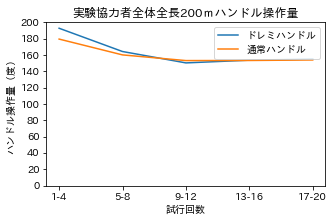

ドレミハンドルの平均値162.61610545439999
通常ハンドルの平均値159.19141289976


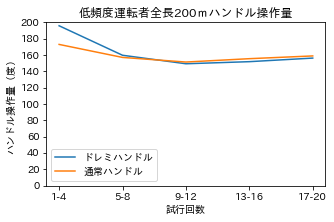

ドレミハンドルの平均値164.32549634819998
通常ハンドルの平均値161.46252577529998


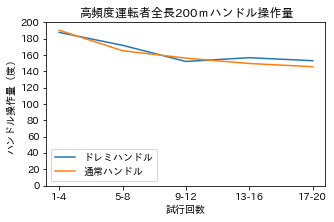

In [ ]:
#ハンドル操作量もどどんとグラフにしようの会
#小さい数にも対応できるようにplotここに降臨
def miniplot(array1,array2,xlabel,ylabel,title,tatehaba):
  on=[]
  off=[]
  on4=[]
  off4=[]
  plt.rcParams["figure.figsize"] = (5,3)
  plt.plot(range(len(array1)),array1,label="ドレミハンドル")
  plt.plot(range(len(array2)),array2,label="通常ハンドル")
  plt.xticks([0,1,2,3,4],["1-4","5-8","9-12","13-16","17-20"])
  # plt.yticks([x for x in range(0,tatehaba,1000)],[x for x in range(0,tatehaba,1000)])
  plt.yticks([0,20,40,60,80,100,120,140,160,180,200])
  # plt.yticks([5,10,15,20,25])
  plt.legend()
  # plt.legend(prop={"size":15},bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.savefig("1104"+title, bbox_inches='tight')


#いきなり実験者間比較をする
#全体のONは　on=[]
 # AとCの人は[][0から20]
 #　BとDの人は[][20から40]
#全体のOFFは　oｆｆ=[]
 # AとCの人は[][20から40]
 #　BとDの人は[][0から20]
#これで全長(option=0)とかカーブ中(option=40)とかカーブ後（option=80）とか決める
option=0
option_name="全長200ｍ"
# option_name="カーブ100m"
# option_name="カーブ後50m"
# def handlegraph(option,option)
on=[]
off=[]
on4=[]
off4=[]
handon=[]
handoff=[]
countall_on=[]
countall_off=[]
#初級者用
countall_on_b=[]
countall_off_b=[]
on_b=[]
off_b=[]
#上級者用
countall_on_m=[]
countall_off_m=[]
on_m=[]
off_m=[]
for i in range(20):
  countall_on=[]
  countall_off=[]
  countall_on_b=[]
  countall_off_b=[]
  countall_on_m=[]
  countall_off_m=[]
  for id in range(24):
    #全員のどれみの1試行目を全部足して，
    if is_doremi_first(member[id][1]): 
      countall_on.append(member_handle540[id][i+option])
      countall_off.append(member_handle540[id][i+20+option])
      if is_beginner(id):
        countall_on_b.append(member_handle540[id][i+option])
        countall_off_b.append(member_handle540[id][i+20+option])
      else:
        countall_on_m.append(member_handle540[id][i+option])
        countall_off_m.append(member_handle540[id][i+20+option])
    else:
      countall_on.append(member_handle540[id][i+20+option])
      countall_off.append(member_handle540[id][i+option])
      if is_beginner(id):
        countall_on_b.append(member_handle540[id][i+20+option])
        countall_off_b.append(member_handle540[id][i+option])
      else:
        countall_on_m.append(member_handle540[id][i+20+option])
        countall_off_m.append(member_handle540[id][i+option])
  on.append(sum(countall_on)/24)
  off.append(sum(countall_off)/24)
  on_b.append(sum(countall_on_b)/15)
  off_b.append(sum(countall_off_b)/15)
  on_m.append(sum(countall_on_m)/9)
  off_m.append(sum(countall_off_m)/9)
times4(on,off)
miniplot(on4,off4,"試行回数","ハンドル操作量（度）","実験協力者全体"+option_name+"ハンドル操作量",4500)
print("ドレミハンドルの平均値"+str(sum(on4)/len(on4)))
print("通常ハンドルの平均値"+str(sum(off4)/len(off4)))
# change540(on4,off4)#540で割ってくれる関数
# miniplot(handon,handoff,"試行回数","ハンドル操作量(度)","全体"+option_name+"ハンドル操作量",1)
plt.show()
times4(on_b,off_b)
miniplot(on4,off4,"試行回数","ハンドル操作量（度）","低頻度運転者"+option_name+"ハンドル操作量",4500)
print("ドレミハンドルの平均値"+str(sum(on4)/len(on4)))
print("通常ハンドルの平均値"+str(sum(off4)/len(off4)))
# change540(on4,off4)
# miniplot(handon,handoff,"試行回数","ハンドル操作量(度)","低頻度運転者"+option_name+"ハンドル操作量",1)
plt.show()
times4(on_m,off_m)
miniplot(on4,off4,"試行回数","ハンドル操作量（度）","高頻度運転者"+option_name+"ハンドル操作量",4500)
print("ドレミハンドルの平均値"+str(sum(on4)/len(on4)))
print("通常ハンドルの平均値"+str(sum(off4)/len(off4)))
# change540(on4,off4)
# miniplot(handon,handoff,"試行回数","ハンドル操作量(度)","高頻度運転者"+option_name+"ハンドル操作量",1)
plt.show()

初心者かどうかスピード平均
初心者37.49428890526249
玄人38.212108512102354

ドレミありかどうかスピード平均
ドレミあり36.83054758837936
ドレミなし38.69639492727551

ドレミありかどうか、かつ初心者かどうかスピード平均
ドレミあり　初心者35.911035440721506
ドレミなし　初心者39.30372143616648
ドレミあり　玄人38.66957188369508
ドレミなし　玄人37.84613781482817

初心者
1: 33.417278633927104 と 32.60529149028855   × ドレミ速い
2: 37.74585459196392 と 38.73450585606059   ○ ドレミ遅い
4: 34.76968573978557 と 37.39593250690381   ○ ドレミ遅い
5: 30.541005476393714 と 31.56048326680165   ○ ドレミ遅い
6: 46.73991966731265 と 39.969337145254606   × ドレミ速い
7: 43.08728585955186 と 41.28137725309085   × ドレミ速い
8: 33.986268350362955 と 32.882779273375114   × ドレミ速い
13: 40.52373441750364 と 41.13699343588916   ○ ドレミ遅い
14: 35.11382082810546 と 34.91550630910001   × ドレミ速い
16: 36.514437052740206 と 39.346634525311075   ○ ドレミ遅い
17: 38.6624667853524 と 43.314624481553025   ○ ドレミ遅い
19: 37.16875723691821 と 36.53192452293469   × ドレミ速い
20: 42.022984576775634 と 42.80239501139991   ○ ドレミ遅い
21: 33.4390664423711 と 34.29034363336375   ○ ドレミ遅い
23: 38.6817679

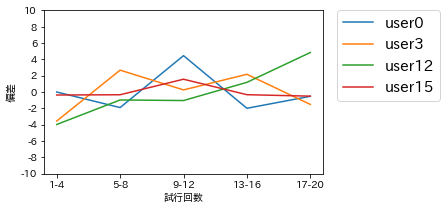

off
2.415274433643977
2.4509797253710595
3.249095097445597
9.667298383089225
5.0087339589266495


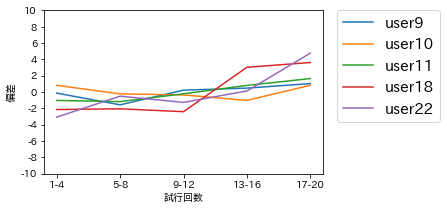

In [ ]:
from statistics import mean, median,variance,stdev
ar4=[]
#これは引数が1つの4試行ごとに分けてくれる素敵な関数
def times4(ar):
  ar4.clear()
  span=4
  for s in range(1,6):
    count=0
    for i in range((s-1)*span,s*span):
      count +=ar[i]
    ar4.append(count/span)

#人ごとのスピード平均
speed_ave=[]
for id in range(24):
  speed_count=0
  for s in range(20):
    speed_count+=sum(member_speed[id][s])/len(member_speed[id][s])
  speed_ave.append(speed_count/20)
#初心者かどうかスピード平均
speed_ave_b=[]
speed_ave_m=[]
for i in range(24):
  if is_beginner(i):
    speed_ave_b.append(speed_ave[i])
  else:
    speed_ave_m.append(speed_ave[i])
print("初心者かどうかスピード平均")
print("初心者"+str(sum(speed_ave_b)/len(speed_ave_b)))
print("玄人"+str(sum(speed_ave_m)/len(speed_ave_m)))

#ドレミありかどうかスピード平均
speed_ave_doremi=[]
speed_ave_nodoremi=[]

#ドレミありかどうか、かつ初心者かどうかスピード平均
speed_ave_doremi_b=[]
speed_ave_doremi_m=[]
speed_ave_nodoremi_b=[]
speed_ave_nodoremi_m=[]
for i in range(24):
  if is_doremi_first(member[i][1]):
    speed_ave_doremi.append(speed_ave[i])
    if is_beginner(i):
      speed_ave_doremi_b.append(speed_ave[i])
    else:
      speed_ave_doremi_m.append(speed_ave[i])
  else:
    speed_ave_nodoremi.append(speed_ave[i])
    if is_beginner(i):
      speed_ave_nodoremi_b.append(speed_ave[i])
    else:
      speed_ave_nodoremi_m.append(speed_ave[i])  
print()      
print("ドレミありかどうかスピード平均")
print("ドレミあり"+str(sum(speed_ave_doremi)/len(speed_ave_doremi)))
print("ドレミなし"+str(sum(speed_ave_nodoremi)/len(speed_ave_nodoremi)))
print()
print("ドレミありかどうか、かつ初心者かどうかスピード平均")
print("ドレミあり　初心者"+str(sum(speed_ave_doremi_b)/len(speed_ave_doremi_b)))
print("ドレミなし　初心者"+str(sum(speed_ave_nodoremi_b)/len(speed_ave_nodoremi_b)))
print("ドレミあり　玄人"+str(sum(speed_ave_doremi_m)/len(speed_ave_doremi_m)))
print("ドレミなし　玄人"+str(sum(speed_ave_nodoremi_m)/len(speed_ave_nodoremi_m)))

print()
do_count=0
no_count=0
print("初心者")
#ひとりのなかで、どれみがある時とない時のスピードを比べたい
for id in range(24):
  on=[]
  off=[]
  for s in range(20):
    if is_doremi_first:
      on.append(sum(member_speed[id][s])/len(member_speed[id][s]))
      off.append(sum(member_speed[id][20+s])/len(member_speed[id][20+s]))
    else:
      off.append(sum(member_speed[id][s])/len(member_speed[id][s]))
      on.append(sum(member_speed[id][20+s])/len(member_speed[id][20+s]))
  if is_beginner(id):
    if (sum(on)/len(on))<(sum(off)/len(off)):
      hanntei="   ○ ドレミ遅い"
      do_count+=1
    else:
      hanntei="   × ドレミ速い"
      no_count+=1
    inton=sum(on)/len(on)
    intoff=sum(off)/len(off)
    #  inton=int(sum(on)/len(on))
    # intoff=int(sum(off)/len(off))
    print(str(id)+": "+str(inton)+" と "+str(intoff)+hanntei)
print(do_count,no_count)
do_count=0
no_count=0
print("玄人")
for id in range(24):
  on=[]
  off=[]
  for s in range(20):
    if is_doremi_first:
      on.append(sum(member_speed[id][s])/len(member_speed[id][s]))
      off.append(sum(member_speed[id][20+s])/len(member_speed[id][20+s]))
    else:
      off.append(sum(member_speed[id][s])/len(member_speed[id][s]))
      on.append(sum(member_speed[id][20+s])/len(member_speed[id][20+s]))
  if not is_beginner(id):
    if (sum(on)/len(on))<(sum(off)/len(off)):
      hanntei="   ○ ドレミ遅い"
      do_count+=1
    else:
      hanntei="   × ドレミ速い"
      no_count+=1
    # inton=sum(on)/len(on)
    # intoff=sum(off)/len(off)
    inton=sum(on)/len(on)
    intoff=sum(off)/len(off)
    print(str(id)+": "+str(inton)+" と "+str(intoff)+hanntei)
print(do_count,no_count)
print("on")
number=list(range(0,20))
number4=list(range(0,5))
#上級者の試行回数ごとのスピードを　ドレミ有無で比べたい
#上級者のON
for id in range(24):
  b_on=[]
  on_dist_ave=[]
  for i in range(20):
    if not is_beginner(id):
      if is_doremi_first(member[id][1]):
        b_on.append(sum(member_speed[id][i])/len(member_speed[id][i]))
  if not is_beginner(id):
    if is_doremi_first(member[id][1]):
      # plt.plot(number,b_on)
      for i in range(20):
        on_dist_ave.append(b_on[i]-(sum(b_on)/20))
      times4(on_dist_ave)
      absar=[]
      for i in range(4):
        absar.append(abs(ar4[i]))
        #iさんのar4の絶対値がabsarに入ってる　＝arをabsにしたのがabsar
      print(sum((absar)))
      plt.plot(number4,ar4,label="user"+str(id))
      plt.savefig("上級者ONスピード偏差", bbox_inches='tight')
      plt.xticks([0,1,2,3,4],["1-4","5-8","9-12","13-16","17-20"])
      plt.legend(prop={"size":15},bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
      plt.yticks([-10,-8,-6,-4,-2,0,2,4,6,8,10],[-10,-8,-6,-4,-2,0,2,4,6,8,10])
      plt.xlabel("試行回数")
      plt.ylabel("偏差")
      # plt.plot(number,on_dist_ave)
      # print(str(id)+"さんの平均速度"+str(sum(b_on)/20))
      print(b_on)
plt.show()
print("off")
#上級者のOFF
for id in range(24):
  b_off=[]
  off_dist_ave=[]
  for i in range(20):
    if not is_beginner(id):
      if not is_doremi_first(member[id][1]):
        b_off.append(sum(member_speed[id][i])/len(member_speed[id][i]))
  if not is_beginner(id):
    if not is_doremi_first(member[id][1]):
      # print(str(id)+"さんの平均速度"+str(sum(b_off)/20))
      for i in range(20):
        off_dist_ave.append(b_off[i]-(sum(b_off)/20))
      times4(off_dist_ave)
      absar=[]
      for i in range(4):
        absar.append(abs(ar4[i]))
        #iさんのar4の絶対値がabsarに入ってる　＝arをabsにしたのがabsar
      print(sum((absar)))
      plt.plot(number4,ar4,label="user"+str(id))
      plt.savefig("上級者OFFスピード偏差", bbox_inches='tight')
      plt.xticks([0,1,2,3,4],["1-4","5-8","9-12","13-16","17-20"])
      plt.legend(prop={"size":15},bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
      plt.yticks([-10,-8,-6,-4,-2,0,2,4,6,8,10],[-10,-8,-6,-4,-2,0,2,4,6,8,10])
      plt.xlabel("試行回数")
      plt.ylabel("偏差")
plt.show()

# #初心者
# for id in range(24):
#   b_on=[]
#   on_dist_ave=[]
#   for i in range(20):
#     if is_beginner(id):
#       if is_doremi_first(member[id][1]):
#         b_on.append(sum(member_speed[id][i])/len(member_speed[id][i]))
#   if is_beginner(id):
#     if is_doremi_first(member[id][1]):
#       # plt.plot(number,b_on)
#       for i in range(20):
#         on_dist_ave.append(b_on[i]-(sum(b_on)/20))
#       times4(on_dist_ave)
#       # absar=[]
#       # for i in range(4):
#       #   absar.append(abs(ar4[i]))
#       #   #iさんのar4の絶対値がabsarに入ってる　＝arをabsにしたのがabsar
#       # print(sum((ar4)))
#       plt.plot(number4,ar4,label="user"+str(id))
#       plt.xticks([0,1,2,3,4],["0-3","4-7","8-11","12-15","16-19"])
#       plt.legend(prop={"size":15},bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
#       plt.yticks([-10,-8,-6,-4,-2,0,2,4,6,8,10],[-10,-8,-6,-4,-2,0,2,4,6,8,10])
#       plt.xlabel("試行回数")
#       plt.ylabel("偏差")
#       # plt.plot(number,on_dist_ave)
#       # print(str(id)+"さんの平均速度"+str(sum(b_on)/20))
# plt.show()
# number4=list(range(0,5))
# print("off")
# #上級者のOFF
# for id in range(24):
#   b_off=[]
#   off_dist_ave=[]
#   for i in range(20):
#     if is_beginner(id):
#       if not is_doremi_first(member[id][1]):
#         b_off.append(sum(member_speed[id][i])/len(member_speed[id][i]))
#   if is_beginner(id):
#     if not is_doremi_first(member[id][1]):
#       # print(str(id)+"さんの平均速度"+str(sum(b_off)/20))
#       for i in range(20):
#         off_dist_ave.append(b_off[i]-(sum(b_off)/20))
#       times4(off_dist_ave)
#       plt.plot(number4,ar4,label="user"+str(id))
#       plt.xticks([0,1,2,3,4],["0-3","4-7","8-11","12-15","16-19"])
#       plt.legend(prop={"size":15},bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
#       plt.yticks([-10,-8,-6,-4,-2,0,2,4,6,8,10],[-10,-8,-6,-4,-2,0,2,4,6,8,10])
#       plt.xlabel("試行回数")
#       plt.ylabel("偏差")
# plt.show()


In [ ]:
member_abshandle=[[[]for j in range(40)] for j in range(26)]
#全部ハンドルを絶対値にする
for id in range(24):
  for s in range(40):
    ti=len(member_handle[id][s])
    for t in range(ti-1):
      member_abshandle[id][s].append(abs(member_handle[id][s][t]))
beginner=[]
master=[]
for id in range(24):
  on=[]
  off=[]
  #ハンドル操作量の合計
  for s in range(20):
    if is_doremi_first(member[id][1]):
      on.append(sum(member_abshandle[id][s]))
    else:
      off.append(sum(member_abshandle[id][s]))
  # for s in range(20,40):
  #   if is_doremi_first(member[id][1]):
  #     off.append(sum(member_abshandle[id][s]))
  #   else:
  #     on.append(sum(member_abshandle[id][s]))
  if is_beginner(id):
    beginner.append((sum(on)/20+sum(off)/20))
  else:
    master.append((sum(on)/20+sum(off)/20))
  # if is_beginner(id):
  #   beginner.append((sum(on)/20+sum(off)/20)/2)
  # else:
  #   master.append((sum(on)/20+sum(off)/20)/2)
print("初心者かどうかハンドル操作量平均")
s=sum(beginner)/len(beginner)
k=sum(master)/len(master)                  
print("初心者"+str(s))
print("玄人"+str(k))
print()

#ドレミありかどうか合計操作量平均
doremi=[]
nodoremi=[]

doremi_b=[]
doremi_m=[]
nodoremi_b=[]
nodoremi_m=[]
for id in range(24):
  on=[]
  off=[]
  #ハンドル操作量の合計
  for s in range(20):
    if is_doremi_first(member[id][1]):
      on.append(sum(member_abshandle[id][s]))
      if is_beginner(id):
        doremi_b.append(sum(member_abshandle[id][s]))
      else:
        doremi_m.append(sum(member_abshandle[id][s]))
    else:
      off.append(sum(member_abshandle[id][s]))
      if is_beginner(id):
        nodoremi_b.append(sum(member_abshandle[id][s]))
      else:
        nodoremi_m.append(sum(member_abshandle[id][s]))
  if is_doremi_first(member[id][1]):
    doremi.append((sum(on)/20))
  else:
    nodoremi.append(sum(off)/20)
print("ドレミありかどうか合計操作量平均")
s=sum(doremi)/len(doremi)
k=sum(nodoremi)/len(nodoremi)                  
print("ドレミあり"+str(s))
print("ドレミなし"+str(k))
print()

print("ドレミありかどうかかつ、初心者かどうか合計操作量平均")
sb=sum(doremi_b)/len(doremi_b)
kb=sum(nodoremi_b)/len(nodoremi_b)    
sm=sum(doremi_m)/len(doremi_m)
km=sum(nodoremi_m)/len(nodoremi_m)                     
print("ドレミあり　初心者"+str(sb))
print("ドレミなし　初心者　"+str(kb))
print("ドレミあり　玄人"+str(sm))
print("ドレミなし　玄人"+str(km))
print()

print()
print("初心者")
inton=[]
intoff=[]
do_count=0
no_count=0
#ひとりのなかで、どれみがある時とない時のスピードを比べたい
for id in range(24):
  on=[]
  off=[]
  for s in range(20):
    if is_doremi_first:
      on.append(sum(member_abshandle[id][s])/len(member_abshandle[id][s]))
      off.append(sum(member_abshandle[id][20+s])/len(member_abshandle[id][20+s]))
    else:
      off.append(sum(member_abshandle[id][s])/len(member_abshandle[id][s]))
      on.append(sum(member_abshandle[id][20+s])/len(member_abshandle[id][20+s]))
  if is_beginner(id):
    if (sum(on)/len(on))<(sum(off)/len(off)):
      hanntei="   ○ ドレミ少ない"
      do_count+=1
    else:
      hanntei="   × ドレミ多い"
      no_count+=1
    print(str(id)+": "+str(sum(on)*540)+" と "+str(sum(off)*540)+hanntei)
print(do_count,no_count)
do_count=0
no_count=0
print("玄人")
for id in range(24):
  on=[]
  off=[]
  for s in range(20):
    if is_doremi_first:
      on.append(sum(member_abshandle[id][s])/len(member_abshandle[id][s]))
      off.append(sum(member_abshandle[id][20+s])/len(member_abshandle[id][20+s]))
    else:
      off.append(sum(member_abshandle[id][s])/len(member_abshandle[id][s]))
      on.append(sum(member_abshandle[id][20+s])/len(member_abshandle[id][20+s]))
  if not is_beginner(id):
    if (sum(on)/len(on))<(sum(off)/len(off)):
      hanntei="   ○ ドレミ少ない"
      do_count+=1
    else:
      hanntei="   × ドレミ多い"
      no_count+=1
    print(str(id)+": "+str(sum(on)*540)+" と "+str(sum(off)*540)+hanntei)
print(do_count,no_count)


# on=[]
# off=[]
# for id in range(24):
#   if is_beginner(id):
#     for s in range(20):
#       if is_doremi_first(id):
#         if sum(member_abshandle[id][s]) < sum(member_abshandle[id][s+20]):
#           hanntei="○　ドレミ少ない"
#         else:
#           hanntei="×　ドレミ多い"
#       else:
#         if sum(member_abshandle[id][s]) < sum(member_abshandle[id][s+20]):
#           hanntei="×　ドレミ多い"
#         else:
#           hanntei="○　ドレミ少ない"
#     print(str(id)+"さんは"+hanntei)
  # else:
  #    if is_doremi_first(id):
  #       if sum(member_abshandle[id][s]) < sum(member_abshandle[id][s+20]):
  #         hanntei="○　ドレミ少ない"
  #       else:
  #         hanntei="×　ドレミ多い"
  #    else:
  #       if sum(member_abshandle[id][s]) < sum(member_abshandle[id][s+20]):
  #         hanntei="×　ドレミ多い"
  #       else:
  #         hanntei="○　ドレミ少ない"
  # print(str(id)+"さんは"+hanntei)


初心者かどうかハンドル操作量平均
初心者6.769586155218
玄人6.782892989470556

ドレミありかどうか合計操作量平均
ドレミあり6.84602364008875
ドレミなし6.703128796036666

ドレミありかどうかかつ、初心者かどうか合計操作量平均
ドレミあり　初心者6.911799742180001
ドレミなし　初心者　6.607056341547145
ドレミあり　玄人6.71447143590625
ドレミなし　玄人6.837630232322


初心者
1: 354.77088771341926 と 356.1534007382613   ○ ドレミ少ない
2: 395.07266244691056 と 409.5007297211516   ○ ドレミ少ない
4: 349.3319400801204 と 347.01410575225106   × ドレミ多い
5: 341.2438729021374 と 336.1227033684528   × ドレミ多い
6: 396.67650644246567 と 401.0488293951595   ○ ドレミ少ない
7: 408.39243547821496 と 415.66178063164654   ○ ドレミ少ない
8: 343.8461892318768 と 352.4346080213362   ○ ドレミ少ない
13: 370.81950786709734 と 379.04501402867635   ○ ドレミ少ない
14: 404.0467198841558 と 401.2797852459017   × ドレミ多い
16: 366.8051101758957 と 395.33457869190073   ○ ドレミ少ない
17: 384.5233974760089 と 382.02851626785866   × ドレミ多い
19: 384.3358548754718 と 386.88735379106504   ○ ドレミ少ない
20: 390.83972266648414 と 413.7673793388812   ○ ドレミ少ない
21: 376.3753974418987 と 384.8908018467289   ○ ドレミ少ない
23

In [ ]:
#最高のグラフメーカー
#opがベースのmenberの配列番号
#op_nameが　ALL or CARVE or AFTER_CARVE
on=[]
off=[]
on4=[]
off4=[]
def surper_graph(op,op_name):
  # deviation_on.clear()
  # deviation_off.clear()
  #実験者内比較
  if op_name=="ALL":
    tate=16
    name="全長200m"
  elif op_name=="CARVE":
    tate=16
    name="カーブ100m"
  else:
    tate=16
    name="カーブ後50ｍ"
  for id in range(24):
    on4.clear()
    off4.clear()
    if id in a_list or id in c_list:
      on=member[id][op]
      off=member[id][op+1]
    if id in b_list or id in d_list:
      on=member[id][op+1]
      off=member[id][op]
    times4(on,off)
    # if member[id][0]==1 or member[id][0]==2 or member[id][0]==4 or member[id][0]==5 or member[id][0]==6 or member[id][0]==7 or member[id][0]==8 or member[id][0]==13 or member[id][0]==14 or member[id][0]==16 or member[id][0]==19 or member[id][0]==20 or member[id][0]==22:
    # if member[id][0]==0 or member[id][0]==3 or member[id][0]==9 or member[i][0]==10 or member[id][0]==11 or member[id][0]==12 or member[id][0]==15 or member[id][0]==17 or member[id][0]==18 or member[id][0]==21:
    # print("ONの平均値"+str(sum(on4)/len(on4)))
    # print("OFFの平均値"+str(sum(off4)/len(off4)))
    # plot(on4,off4,"試行回数","修正舵回数",name+"_"+str(member[id][2]),tate)
    # plt.show()

  #全回人数の平均
  on=[]
  off=[]
  on4.clear()
  off4.clear()
  for s in range(20):
    count_on=0
    num_on=0
    count_off=0
    num_off=0
    for i in range(24):
      if is_doremi_first(member[i][1]):
        count_on+=member[i][op][s]
        num_on+=1
      else:
        count_off+=member[i][op][s]
        num_off+=1
    on.append(count_on/num_on)
    off.append(count_off/num_off)
  print("ONの平均値"+str(sum(on)/len(on)))
  print("OFFの平均値"+str(sum(off)/len(off)))
  # plot(on,off,"試行回数","修正舵回数",name+"修正舵回数平均",tate)  
  # plt.show()
  times4(on,off)
  print("ONの5回平均値（全長　、全員）"+str(sum(on4)/len(on4)))
  print("OFFの5回平均値（全長　、全員）"+str(sum(off4)/len(off4)))
  plot(on4,off4,"試行回数","修正舵回数","実験協力者全体"+name+"修正舵回数平均",tate)  
  plt.savefig("実験協力者全体"+name+"修正舵回数平均", bbox_inches='tight')
  plt.show()

  #初心者とで分ける
  bignner_on=[]
  bignner_off=[]
  master_on=[]
  master_off=[]
  #全回数の平均
  for s in range(20):
    count_b_on=0
    num_b_on=0
    count_b_off=0 
    num_b_off=0
    count_m_on=0 
    num_m_on=0
    count_m_off=0
    num_m_off=0
    for i in range(24):
      #ドレミ先組だったら
      if is_doremi_first(member[i][1]):
        #かつ初心者だったら
        if is_beginner(member[i][0]):
          count_b_on += member[i][op][s]
          num_b_on += 1
        #かつ玄人だったら
        else:  
          count_m_on += member[i][op][s]
          num_m_on += 1
      else:
        #かつ初心者だったら
        if is_beginner(member[i][0]):
          count_b_off += member[i][op][s]
          num_b_off += 1
        #かつ玄人だったら
        else:
          count_m_off += member[i][op][s]
          num_m_off += 1
    bignner_on.append(count_b_on/num_b_on)
    master_on.append(count_m_on/num_m_on) 
    bignner_off.append(count_b_off/num_b_off)
    master_off.append(count_m_off/num_m_off)
  print(bignner_on)
  print(bignner_off)
  print(master_on)
  print(master_off)
  print("初心者ONの平均値"+str(sum(bignner_on)/len(bignner_on)))
  print("初心者OFFの平均値"+str(sum(bignner_off)/len(bignner_off)))
  print("上級者ONの平均値"+str(sum(master_on)/len(master_on)))
  print("上級者OFFの平均値"+str(sum(master_off)/len(master_off)))
  # plot(bignner_on,bignner_off,"Number of trials","Number of steering correction","bignner_"+op_name+"_AVERAGE",20)  
  plt.show()
  # plot(master_on,master_off,"Number of trials","Number of steering correction","master_"+op_name+"_AVERAGE",20)  
  plt.show()

  #初心者と分けたやつを4回ずつ平均
  span=4
  bignner_on5=[]
  bignner_off5=[]
  master_on5=[]
  master_off5=[]
  for s in range(1,6):
    co=0
    for i in range((s-1)*span,s*span):
      co=co+bignner_on[i]
    bignner_on5.append(co/span)
    co=0
    for i in range((s-1)*span,s*span):
      co=co+bignner_off[i]
    bignner_off5.append(co/span)
    co=0
    for i in range((s-1)*span,s*span):
      co=co+master_on[i]
    master_on5.append(co/span)
    co=0
    for i in range((s-1)*span,s*span):
      co=co+master_off[i]
    master_off5.append(co/span)
  print("================================================")
  print(bignner_on5)
  print(bignner_off5)
  print("初心者ONの平均値"+str(sum(bignner_on5)/len(bignner_on5)))
  print("初心者OFFの平均値"+str(sum(bignner_off5)/len(bignner_off5)))
  plot(bignner_on5,bignner_off5,"試行回数","修正舵回数","低頻度運転者"+name+"修正舵回数平均",tate)  
  plt.savefig("低頻度運転者"+name+"修正舵回数平均", bbox_inches='tight')
  plt.show()
  print(master_on5)
  print(master_off5)
  print("上級者ONの平均値"+str(sum(master_on5)/len(master_on5)))
  print("上級者OFFの平均値"+str(sum(master_off5)/len(master_off5)))  
  plot(master_on5,master_off5,"試行回数","修正舵回数","高頻度運転者"+name+"修正舵回数平均",tate) 
  plt.savefig("高頻度運転者"+name+"修正舵回数平均", bbox_inches='tight')
  plt.show()

ONの平均値10.429166666666665
OFFの平均値10.575
ONの5回平均値（全長　、全員）10.429166666666665
OFFの5回平均値（全長　、全員）10.575000000000001


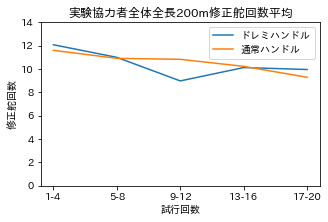

[11.375, 11.375, 14.5, 13.5, 12.0, 12.5, 11.125, 10.0, 10.25, 11.0, 9.625, 8.25, 10.125, 11.0, 10.625, 10.875, 10.25, 10.625, 13.125, 9.0]
[16.142857142857142, 13.571428571428571, 10.571428571428571, 11.285714285714286, 13.714285714285714, 12.285714285714286, 13.428571428571429, 11.714285714285714, 12.0, 12.428571428571429, 12.0, 12.0, 11.428571428571429, 10.428571428571429, 11.857142857142858, 8.571428571428571, 9.0, 10.714285714285714, 9.571428571428571, 10.571428571428571]
[13.0, 13.0, 8.75, 8.75, 7.5, 8.75, 13.5, 11.0, 5.75, 9.25, 6.75, 7.75, 8.0, 7.0, 12.75, 8.5, 7.75, 8.0, 9.0, 8.75]
[9.6, 10.8, 10.4, 8.4, 8.4, 8.6, 9.6, 6.6, 8.6, 10.0, 8.4, 9.2, 9.6, 10.8, 9.4, 9.2, 9.8, 7.0, 6.2, 10.4]
初心者ONの平均値11.05625
初心者OFFの平均値11.664285714285715
上級者ONの平均値9.175
上級者OFFの平均値9.05
[12.6875, 11.40625, 9.78125, 10.65625, 10.75]
[12.892857142857142, 12.785714285714286, 12.107142857142858, 10.571428571428571, 9.964285714285714]
初心者ONの平均値11.05625
初心者OFFの平均値11.664285714285715


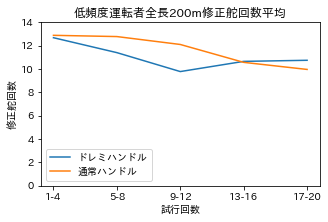

[10.875, 10.1875, 7.375, 9.0625, 8.375]
[9.799999999999999, 8.3, 9.05, 9.75, 8.35]
上級者ONの平均値9.175
上級者OFFの平均値9.05


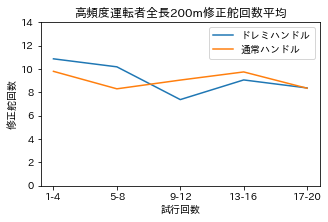

In [ ]:
import numpy as np
#全長を計算
surper_graph(3,"ALL")
# #カーブ中を計算
# surper_graph(7,"CARVE")
# #カーブ後を計算
# surper_graph(11,"AFTER_CARVE")

○
高頻度運転者
ドレミあり平均8.05
どれみ無し平均9.65


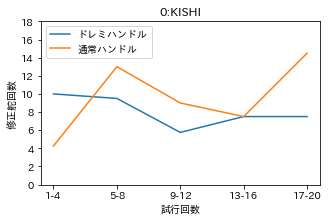

×
低頻度運転者
ドレミあり平均11.75
どれみ無し平均11.6


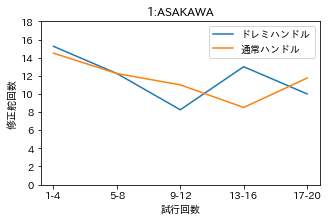

×
低頻度運転者
ドレミあり平均18.75
どれみ無し平均14.35


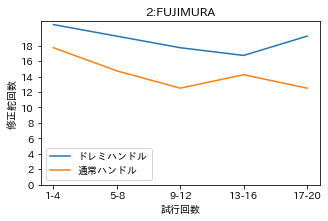

○
高頻度運転者
ドレミあり平均8.9
どれみ無し平均11.8


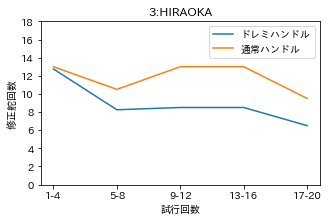

×
低頻度運転者
ドレミあり平均13.55
どれみ無し平均9.4


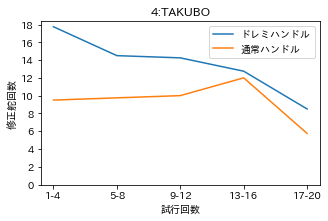

×
低頻度運転者
ドレミあり平均8.1
どれみ無し平均4.7


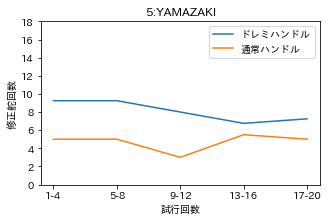

○
低頻度運転者
ドレミあり平均8.15
どれみ無し平均10.5


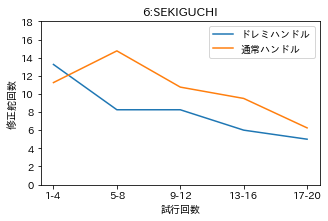

○
低頻度運転者
ドレミあり平均8.05
どれみ無し平均9.5


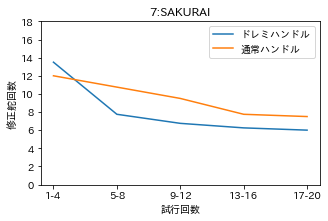

×
低頻度運転者
ドレミあり平均12.85
どれみ無し平均11.95


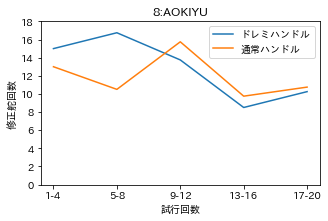

×
高頻度運転者
ドレミあり平均9.9
どれみ無し平均9.55


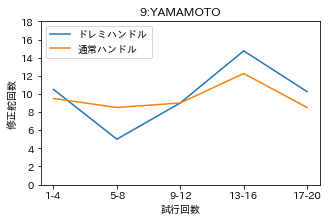

×
高頻度運転者
ドレミあり平均12.0
どれみ無し平均11.7


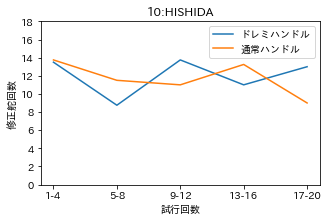

○
高頻度運転者
ドレミあり平均4.4
どれみ無し平均7.35


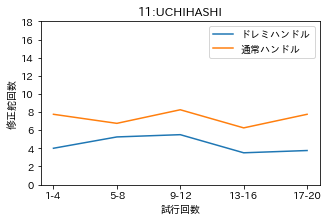

○
高頻度運転者
ドレミあり平均8.8
どれみ無し平均9.35


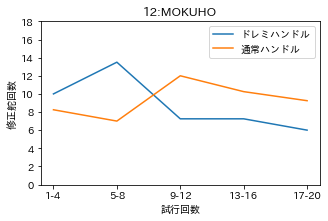

○
低頻度運転者
ドレミあり平均8.45
どれみ無し平均8.8


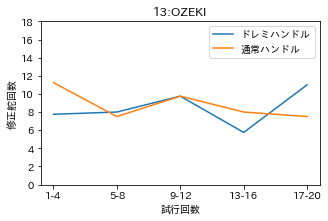

×
低頻度運転者
ドレミあり平均10.35
どれみ無し平均9.2


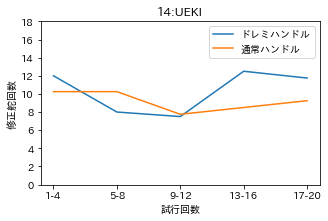

×
高頻度運転者
ドレミあり平均10.95
どれみ無し平均7.35


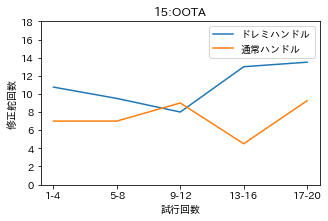

○
低頻度運転者
ドレミあり平均6.1
どれみ無し平均6.85


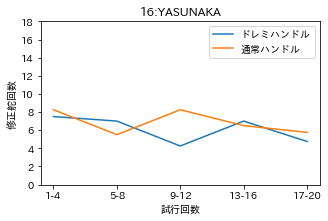

○
低頻度運転者
ドレミあり平均11.4
どれみ無し平均12.0


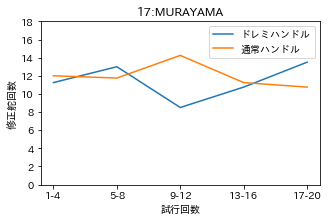

○
高頻度運転者
ドレミあり平均6.8
どれみ無し平均8.65


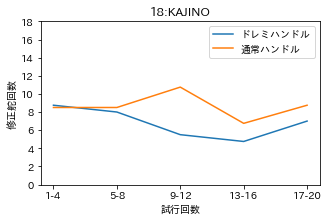

○
低頻度運転者
ドレミあり平均8.4
どれみ無し平均10.75


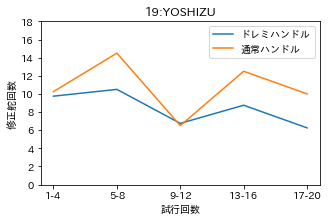

×
低頻度運転者
ドレミあり平均12.0
どれみ無し平均10.45


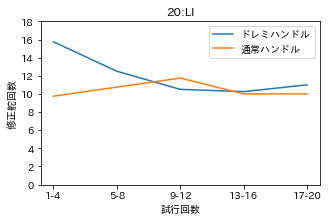

○
低頻度運転者
ドレミあり平均11.4
どれみ無し平均13.4


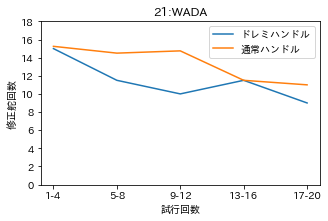

×
高頻度運転者
ドレミあり平均9.25
どれみ無し平均8.0


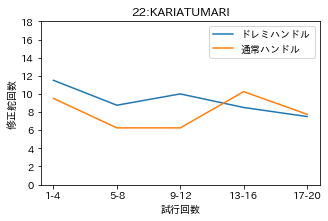

○
低頻度運転者
ドレミあり平均14.25
どれみ無し平均15.1


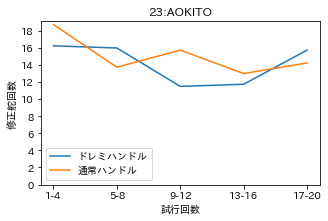

○13人
そのうち
低頻度運転者8人 割合は53.333333333333336
高頻度運転者5人 割合は55.55555555555556
×11人
そのうち
低頻度運転者7人 割合は46.666666666666664
高頻度運転者4人 割合は44.44444444444444


In [ ]:
#1人ひとりのグラフを出す
maru=0
batsu=0
maru_b=0
maru_m=0
batsu_b=0
batsu_m=0
for id in range(24):
  num_doremi=0
  num_nodoremi=0
  if is_doremi_first(member[id][1]):
    times4(member[id][3],member[id][4])
    for i in range(20):
      num_doremi+=member[id][3][i]
      num_nodoremi+=member[id][4][i]
  else:
    times4(member[id][4],member[id][3])
    for i in range(20):
      num_doremi+=member[id][4][i]
      num_nodoremi+=member[id][3][i]
  if (num_doremi/20)<(num_nodoremi/20):
    print("○")
    maru+=1
    if is_beginner(id):
      print("低頻度運転者")
      maru_b+=1
    else:
      print("高頻度運転者")
      maru_m+=1
  else:
    print("×")
    batsu+=1
    if is_beginner(id):
      print("低頻度運転者")
      batsu_b+=1
    else:
      print("高頻度運転者")
      batsu_m+=1

  print("ドレミあり平均"+str(num_doremi/20))
  print("どれみ無し平均"+str(num_nodoremi/20))
  plot(on4,off4,"試行回数","修正舵回数",str(id)+":"+str(member[id][2]),20) 
  plt.savefig("1121"+str(id)+":"+str(member[id][2]), bbox_inches='tight')
  plt.show()
print("○"+str(maru)+"人")
print("そのうち")
print("低頻度運転者"+str(maru_b)+"人 割合は"+str(maru_b/15*100))
print("高頻度運転者"+str(maru_m)+"人 割合は"+str(maru_m/9*100))
print("×"+str(batsu)+"人")
print("そのうち")
print("低頻度運転者"+str(batsu_b)+"人 割合は"+str(batsu_b/15*100))
print("高頻度運転者"+str(batsu_m)+"人 割合は"+str(batsu_m/9*100))

In [ ]:
#対応なしｔ検定を行う　没
import math
import pandas as pd
import scipy.stats as st
from scipy.stats import f
deviation_on=[]
deviation_off=[]
deviation_on_b=[]
deviation_off_b=[]
deviation_on_m=[]
deviation_off_m=[]
xa=[]
xb=[]
def deviation(op):
  print("どれみあり")
  for id in range(24):
    if is_beginner(id):
      if is_doremi_first(member[id][1]):        
        # print("ドレミありの"+str(member[id][2]))
        print(member[id][op])
  print("どれみ無し")
  for id in range(24):
    if is_beginner(id):
      if not is_doremi_first(member[id][1]):
        # print("ドレミ無しの"+str(member[id][2]))
        print(member[id][op])
    
  # for s in range(20):
  #   deviation_on=[]
  #   deviation_off=[]
  #   deviation_on_b=[]
  #   deviation_off_b=[]
  #   deviation_on_m=[]
  #   deviation_off_m=[]
  #   for id in range (24):
  #     if is_doremi_first(member[id][1]):
  #       deviation_on.append(member[id][op][s])
  #     else:
  #       deviation_off.append(member[id][op][s])
  # for s in range(20):
  #   for id in range (24):
  #     if is_beginner(id):
  #       if is_doremi_first(member[id][1]):
  #         deviation_on_b.append(member[id][op][s])
  #       else:
  #         deviation_off_b.append(member[id][op][s])
  #     else:
  #       if is_doremi_first(member[id][1]):
  #         deviation_on_m.append(member[id][op][s])
  #       else:
  #         deviation_off_m.append(member[id][op][s])
      # print(deviation_on)
      # print(deviation_off)
      # print()
      # print(deviation_on_b)
      # print(deviation_off_b)
      # print()
      # print(deviation_on_m)
      # print(deviation_off_m)

  # xa=pd.Series(deviation_on)
  # xb=pd.Series(deviation_off)
  # xa=np.array(deviation_on)
  # xb=np.array(deviation_off)

  # t, p = st.ttest_ind(xa, xb, equal_var=True)
  # MU = abs(xa.mean()-xb.mean())
  # SE =  MU/t
  # DF = len(xa)+len(xb)-2
  # CI = st.t.interval(alpha=0.95, loc=MU, scale=SE, df=DF)

  # print('対応なしt検定')
  # print(f'p値 = {p:.3f}')
  # print(f't値 = {t:.2f}')
  # print(f'平均値の差   = {MU:.2f}')
  # print(f'差の標準誤差 = {SE:.2f}')
  # print(t)
  # print(MU-t*SE)
  # print("から")
  # print(MU+t*SE)
  # print(f'平均値の差の95%信頼区間CI = [{CI[0]:.2f} , {CI[1]:.2f}]')


# #p値（有意確率）がp<0.05(5%)は「2つの標本の平均値に有意差がない」
# print("全長")
# deviation(op=3)
# print()
print("カーブ中")
deviation(op=7)
# print()
# print("カーブ後")
# deviation(op=11)



In [ ]:
!pip install openpyxl
!pip install xlwt

In [ ]:
#分散分析（実験者内修正舵回数比較　2要因　aAb）のためのデータ取り出し
#全長
#これをカーブ中に限定してやろう
import requests
import pandas as pd
exportlist=[]
#ドレミあり
print("ドレミあり20試行")
for id in range(24):
  if is_doremi_first(member[id][1]):
    a=member[id][3]
    exportlist.append(a)
    print(member[id][2],member[id][3])
  else:
    print(member[id][2],member[id][4])
    a=member[id][4]
    exportlist.append(a)
print()
df = pd.DataFrame(exportlist)#pandasのデータフレームに収納 
df.T.to_excel("修正舵回数(ドレミあり).xlsx",sheet_name='new_sheet_name');
df
exportlist.clear()

In [ ]:
exportlist=[]
#ドレミ無し
print("ドレミ無し20試行")
for id in range(24):
  if is_doremi_first(member[id][1]):
    a=member[id][4]
    exportlist.append(a)
    print(member[id][2],member[id][4])
  else:
    print(member[id][2],member[id][3])
    a=member[id][3]
    exportlist.append(a)
print()
df = pd.DataFrame(exportlist)#pandasのデータフレームに収納 
df.T.to_excel('修正舵回数（ドレミ無し).xlsx', sheet_name='new_sheet_name');
df

ドレミ無し20試行
KISHI [5, 6, 3, 3, 3, 15, 27, 7, 4, 11, 11, 10, 8, 11, 7, 4, 13, 19, 16, 10]
ASAKAWA [13, 18, 11, 16, 15, 14, 7, 13, 14, 11, 8, 11, 7, 10, 8, 9, 8, 24, 4, 11]
FUJIMURA [18, 21, 16, 16, 14, 16, 17, 12, 10, 7, 15, 18, 15, 13, 13, 16, 13, 10, 10, 17]
HIRAOKA [9, 19, 12, 12, 8, 16, 9, 9, 13, 12, 12, 15, 16, 18, 4, 14, 10, 12, 8, 8]
TAKUBO [13, 5, 9, 11, 10, 11, 9, 9, 9, 11, 12, 8, 12, 14, 13, 9, 7, 3, 9, 4]
YAMAZAKI [3, 3, 7, 7, 3, 5, 9, 3, 3, 3, 3, 3, 5, 5, 7, 5, 7, 3, 7, 3]
SEKIGUCHI [12, 17, 6, 10, 16, 8, 18, 17, 8, 10, 6, 19, 11, 9, 15, 3, 8, 3, 6, 8]
SAKURAI [14, 12, 8, 14, 13, 14, 8, 8, 12, 9, 9, 8, 8, 9, 8, 6, 3, 4, 9, 14]
AOKIYU [25, 8, 6, 13, 11, 12, 9, 10, 14, 23, 18, 8, 10, 11, 12, 6, 13, 13, 7, 10]
YAMAMOTO [9, 9, 13, 7, 7, 11, 9, 7, 11, 7, 9, 9, 17, 9, 12, 11, 11, 6, 5, 12]
HISHIDA [11, 18, 16, 10, 11, 7, 17, 11, 13, 11, 10, 10, 12, 21, 10, 10, 8, 12, 6, 10]
UCHIHASHI [7, 10, 8, 6, 5, 6, 9, 7, 3, 9, 11, 10, 4, 6, 7, 8, 14, 6, 5, 6]
MOKUHO [7, 13, 5, 8, 8, 6, 6, 8, 9,

NameError: ignored

In [ ]:
#分散分析（実験者内修正舵回数比較　2要因　aAb）のためのデータ取り出し
#カーブ中に限定してやろう
import requests
import pandas as pd
exportlist=[]
#ドレミあり
print("ドレミあり20試行")
for id in range(24):
  if is_doremi_first(member[id][1]):
    a=member[id][7]
    exportlist.append(a)
    print(member[id][2],member[id][7])
  else:
    print(member[id][2],member[id][8])
    a=member[id][8]
    exportlist.append(a)
print()
df = pd.DataFrame(exportlist)#pandasのデータフレームに収納 
df.T.to_excel("修正舵回数(ドレミありカーブ中).xlsx",sheet_name='new_sheet_name');
df
exportlist.clear()

ドレミあり20試行
KISHI [18, 10, 7, 5, 4, 10, 17, 7, 7, 4, 4, 8, 9, 4, 7, 10, 9, 6, 8, 7]
ASAKAWA [10, 7, 19, 25, 9, 22, 9, 9, 11, 8, 9, 5, 13, 10, 17, 12, 12, 7, 12, 9]
FUJIMURA [15, 17, 21, 30, 17, 20, 24, 16, 18, 20, 17, 16, 12, 21, 16, 18, 16, 18, 21, 22]
HIRAOKA [17, 18, 8, 8, 6, 8, 11, 8, 6, 10, 8, 10, 5, 7, 15, 7, 5, 8, 10, 3]
TAKUBO [25, 17, 20, 9, 24, 14, 12, 8, 13, 13, 22, 9, 12, 18, 10, 11, 5, 13, 10, 6]
YAMAZAKI [8, 14, 9, 6, 8, 14, 5, 10, 13, 9, 3, 7, 7, 5, 11, 4, 7, 12, 5, 5]
SEKIGUCHI [8, 12, 16, 17, 12, 5, 9, 7, 8, 3, 13, 9, 9, 7, 3, 5, 5, 7, 5, 3]
SAKURAI [15, 14, 10, 15, 9, 7, 5, 10, 8, 7, 5, 7, 7, 6, 5, 7, 5, 10, 6, 3]
AOKIYU [5, 17, 25, 13, 19, 15, 18, 15, 13, 7, 13, 22, 9, 7, 6, 12, 15, 13, 9, 4]
YAMAMOTO [21, 9, 7, 5, 5, 5, 5, 5, 6, 11, 10, 9, 17, 17, 15, 10, 13, 6, 15, 7]
HISHIDA [20, 12, 13, 9, 10, 5, 9, 11, 15, 10, 9, 21, 15, 13, 11, 5, 13, 9, 15, 15]
UCHIHASHI [7, 3, 3, 3, 3, 6, 7, 5, 5, 6, 4, 7, 5, 2, 3, 4, 6, 1, 3, 5]
MOKUHO [8, 10, 12, 10, 12, 14, 10, 18, 8, 7, 7, 

In [ ]:
exportlist=[]
#ドレミ無し
#カーブ中
print("ドレミ無し20試行")
for id in range(24):
  if is_doremi_first(member[id][1]):
    a=member[id][8]
    exportlist.append(a)
    print(member[id][2],member[id][8])
  else:
    print(member[id][2],member[id][7])
    a=member[id][7]
    exportlist.append(a)
print()
df = pd.DataFrame(exportlist)#pandasのデータフレームに収納 
df.T.to_excel('修正舵回数（ドレミ無しカーブ中).xlsx', sheet_name='new_sheet_name');
df

ドレミ無し20試行
KISHI [5, 5, 3, 3, 3, 7, 9, 5, 3, 7, 9, 9, 3, 5, 7, 3, 5, 11, 6, 3]
ASAKAWA [9, 15, 5, 13, 13, 8, 5, 13, 9, 11, 7, 11, 7, 7, 5, 7, 7, 5, 3, 8]
FUJIMURA [9, 13, 7, 11, 11, 11, 9, 11, 7, 7, 9, 11, 11, 9, 7, 9, 7, 7, 7, 11]
HIRAOKA [5, 7, 4, 5, 7, 8, 1, 7, 6, 4, 3, 3, 7, 8, 3, 7, 5, 5, 5, 4]
TAKUBO [11, 3, 8, 8, 7, 8, 9, 9, 9, 11, 9, 7, 11, 8, 13, 9, 5, 3, 7, 3]
YAMAZAKI [3, 3, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 7, 5, 5, 3, 7, 3]
SEKIGUCHI [5, 11, 5, 7, 11, 6, 15, 11, 7, 9, 3, 7, 9, 9, 10, 3, 3, 1, 3, 7]
SAKURAI [11, 9, 5, 9, 9, 11, 5, 7, 9, 7, 7, 7, 5, 5, 5, 5, 3, 3, 4, 5]
AOKIYU [15, 7, 3, 4, 6, 9, 4, 5, 12, 11, 7, 6, 7, 6, 10, 4, 7, 9, 7, 8]
YAMAMOTO [9, 7, 11, 6, 7, 9, 7, 5, 9, 7, 9, 7, 13, 9, 11, 7, 9, 5, 3, 5]
HISHIDA [11, 9, 10, 7, 7, 3, 11, 9, 7, 11, 7, 9, 9, 11, 9, 5, 3, 9, 5, 9]
UCHIHASHI [5, 5, 3, 3, 3, 5, 7, 7, 3, 7, 9, 5, 3, 5, 5, 7, 7, 5, 3, 5]
MOKUHO [7, 7, 5, 6, 5, 5, 5, 7, 5, 11, 11, 11, 5, 9, 7, 5, 9, 5, 7, 5]
OZEKI [7, 7, 7, 5, 3, 3, 3, 3, 3, 3, 7, 3, 4, 3, 5

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,5,5,3,3,3,7,9,5,3,7,9,9,3,5,7,3,5,11,6,3
1,9,15,5,13,13,8,5,13,9,11,7,11,7,7,5,7,7,5,3,8
2,9,13,7,11,11,11,9,11,7,7,9,11,11,9,7,9,7,7,7,11
3,5,7,4,5,7,8,1,7,6,4,3,3,7,8,3,7,5,5,5,4
4,11,3,8,8,7,8,9,9,9,11,9,7,11,8,13,9,5,3,7,3
5,3,3,5,5,3,3,3,3,3,3,3,3,5,5,7,5,5,3,7,3
6,5,11,5,7,11,6,15,11,7,9,3,7,9,9,10,3,3,1,3,7
7,11,9,5,9,9,11,5,7,9,7,7,7,5,5,5,5,3,3,4,5
8,15,7,3,4,6,9,4,5,12,11,7,6,7,6,10,4,7,9,7,8
9,9,7,11,6,7,9,7,5,9,7,9,7,13,9,11,7,9,5,3,5


In [ ]:
#分散分析（実験者内修正舵回数比較　2要因　aAb）のためのデータ取り出し
#カーブ後に限定してやろう
import requests
import pandas as pd
exportlist=[]
#ドレミあり
print("ドレミあり20試行")
for id in range(24):
  if is_doremi_first(member[id][1]):
    a=member[id][11]
    exportlist.append(a)
    print(member[id][2],member[id][11])
  else:
    print(member[id][2],member[id][12])
    a=member[id][12]
    exportlist.append(a)
print()
df = pd.DataFrame(exportlist)#pandasのデータフレームに収納 
df.T.to_excel("修正舵回数(ドレミありカーブ後).xlsx",sheet_name='new_sheet_name');
df
exportlist.clear()

ドレミあり20試行
KISHI [5, 3, 2, 0, 1, 3, 2, 2, 0, 1, 1, 1, 0, 1, 0, 3, 4, 1, 1, 2]
ASAKAWA [1, 0, 0, 3, 1, 3, 1, 1, 1, 1, 1, 0, 0, 1, 3, 3, 0, 2, 2, 3]
FUJIMURA [2, 5, 1, 6, 3, 2, 2, 4, 0, 0, 1, 4, 0, 3, 0, 0, 2, 2, 1, 5]
HIRAOKA [3, 1, 0, 0, 0, 1, 3, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 3, 0, 0]
TAKUBO [3, 3, 7, 0, 1, 1, 1, 3, 1, 1, 1, 0, 0, 5, 1, 2, 1, 4, 0, 1]
YAMAZAKI [1, 3, 1, 1, 1, 1, 0, 1, 2, 4, 0, 2, 1, 2, 1, 1, 2, 5, 0, 0]
SEKIGUCHI [1, 2, 1, 2, 1, 0, 2, 0, 3, 0, 6, 2, 1, 0, 2, 2, 2, 0, 0, 2]
SAKURAI [2, 3, 1, 2, 2, 1, 0, 3, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0]
AOKIYU [0, 4, 5, 0, 2, 1, 3, 0, 0, 0, 3, 7, 0, 0, 1, 3, 2, 0, 0, 1]
YAMAMOTO [1, 2, 1, 1, 2, 2, 2, 2, 1, 4, 0, 0, 4, 0, 4, 1, 2, 3, 2, 5]
HISHIDA [3, 4, 1, 2, 3, 0, 0, 3, 1, 0, 2, 0, 1, 4, 1, 2, 1, 2, 6, 6]
UCHIHASHI [1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0]
MOKUHO [2, 3, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2]
OZEKI [0, 0, 3, 0, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 4, 1, 7, 0]
UEKI [1, 0, 7, 1, 0, 2, 

In [ ]:
exportlist=[]
#ドレミ無し
#カーブ後
print("ドレミ無し20試行")
for id in range(24):
  if is_doremi_first(member[id][1]):
    a=member[id][12]
    exportlist.append(a)
    print(member[id][2],member[id][8])
  else:
    print(member[id][2],member[id][11])
    a=member[id][11]
    exportlist.append(a)
print()
df = pd.DataFrame(exportlist)#pandasのデータフレームに収納 
df.T.to_excel('修正舵回数（ドレミ無しカーブ後).xlsx', sheet_name='new_sheet_name');
df

ドレミ無し20試行
KISHI [5, 5, 3, 3, 3, 7, 9, 5, 3, 7, 9, 9, 3, 5, 7, 3, 5, 11, 6, 3]
ASAKAWA [9, 15, 5, 13, 13, 8, 5, 13, 9, 11, 7, 11, 7, 7, 5, 7, 7, 5, 3, 8]
FUJIMURA [9, 13, 7, 11, 11, 11, 9, 11, 7, 7, 9, 11, 11, 9, 7, 9, 7, 7, 7, 11]
HIRAOKA [5, 7, 4, 5, 7, 8, 1, 7, 6, 4, 3, 3, 7, 8, 3, 7, 5, 5, 5, 4]
TAKUBO [11, 3, 8, 8, 7, 8, 9, 9, 9, 11, 9, 7, 11, 8, 13, 9, 5, 3, 7, 3]
YAMAZAKI [3, 3, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 7, 5, 5, 3, 7, 3]
SEKIGUCHI [0, 6, 0, 1, 4, 1, 3, 4, 1, 1, 2, 5, 1, 0, 3, 0, 3, 1, 3, 1]
SAKURAI [3, 3, 3, 3, 4, 3, 3, 1, 3, 1, 2, 1, 3, 3, 3, 1, 0, 1, 4, 4]
AOKIYU [1, 0, 1, 3, 3, 2, 1, 0, 0, 2, 5, 1, 3, 2, 1, 1, 4, 2, 0, 1]
YAMAMOTO [0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 4, 0, 1, 4, 1, 1, 2, 4]
HISHIDA [0, 3, 2, 2, 4, 4, 6, 2, 1, 0, 3, 0, 2, 7, 0, 0, 2, 1, 0, 1]
UCHIHASHI [1, 5, 5, 3, 1, 1, 1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 2, 1, 1, 1]
MOKUHO [7, 7, 5, 6, 5, 5, 5, 7, 5, 11, 11, 11, 5, 9, 7, 5, 9, 5, 7, 5]
OZEKI [7, 7, 7, 5, 3, 3, 3, 3, 3, 3, 7, 3, 4, 3, 5, 5, 3, 3, 4, 1]
UE

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,1,0,0,0,3,3,2,1,4,2,1,4,0,0,1,7,0,4,0
1,3,3,5,2,1,1,2,0,2,0,1,0,0,3,1,2,0,0,1,1
2,3,4,3,4,3,2,1,0,2,0,1,5,1,0,4,2,1,3,2,2
3,3,5,2,0,0,1,5,1,5,1,1,5,0,4,0,3,0,1,1,1
4,0,2,0,2,3,2,0,0,0,0,2,0,0,4,0,0,2,0,2,1
5,0,0,2,2,0,2,3,0,0,0,0,0,0,0,0,0,2,0,0,0
6,0,6,0,1,4,1,3,4,1,1,2,5,1,0,3,0,3,1,3,1
7,3,3,3,3,4,3,3,1,3,1,2,1,3,3,3,1,0,1,4,4
8,1,0,1,3,3,2,1,0,0,2,5,1,3,2,1,1,4,2,0,1
9,0,2,2,0,0,2,2,2,2,0,0,2,4,0,1,4,1,1,2,4
